In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pyvi import ViTokenizer

import sklearn.naive_bayes as naive_bayes
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

seed = 42

%matplotlib inline

In [2]:
data_train = load_files(container_path="data/news_1135/", encoding="utf-8")

print(data_train.filenames[0:3])
print("Tong so file: {}" .format( len(data_train.filenames)))
print("Danh sách 10 nhãn và id tương ứng: ", [(idx, name) for idx, name in enumerate(data_train.target_names[0:10])])

['data/news_1135/Thể thao\\2e62de81ade8318f66cc740f5ede5607ea1bf002.txt'
 'data/news_1135/Thể thao\\f9bd156031140a7db52ae51de4561f234a0eb277.txt'
 'data/news_1135/Thể thao\\aeeb3b3b0dfc936de928f0b004259aca70aa4efa.txt']
Tong so file: 224
Danh sách 10 nhãn và id tương ứng:  [(0, 'Giải trí'), (1, 'Khoa học - Công nghệ'), (2, 'Kinh tế'), (3, 'Pháp luật'), (4, 'Sức khỏe'), (5, 'Thể thao'), (6, 'Thời sự')]


In [3]:
print(data_train.data[0])

Dân_trí Sáng 5/12 , giải quần_vợt các tay_vợt xuất_sắc Việt_Nam - Cúp Vietravel 2016 đã chính_thức khai_mạc tại TP Vinh - Nghệ_An . Tham_dự giải hơn 30 tay_vợt xuất_sắc nhất của Liên_đoàn quần_vợt Việt_Nam . Dự lễ khai_mạc có ông Nguyễn Trọng Hổ - Vụ_trưởng Vụ thể_thao thành_tích cao II ; Đoàn Quốc Cường - Trưởng bộ_môn quần_vợt Liên_đoàn quần_vợt Việt_Nam ; Nguyễn Quốc Kỳ - Tổng_Giám_đốc Viettravel , Phó_Chủ_tịch kiêm Tổng_thư_ký Liên_đoàn quần_vợt Việt_Nam cùng lãnh_đạo tỉnh Nghệ_An . Giải quần_vợt các cây_vợt xuất_sắc Việt_Nam - Cup Vietravel 2016 do Liên_đoàn Quần_vợt Việt_Nam VTF phối_hợp với Sở VH - TT - DL và Liên_đoàn quần_vợt Nghệ_An NTF tổ_chức ; là giải đấu chuyên_nghiệp quốc_gia lần đầu_tiên được tổ_chức tại Nghệ_An . Ông Nguyễn Quốc Kỳ - PCT kiêm TTK Liên_đoàn quần_vợt Việt_Nam Tham_gia giải lần này có 22 VĐV nam , 9 VĐV nữ có điểm xếp_hạng cao nhất của bộ_môn quần_vợt chuyên_nghiệp , đến từ các trung_tâm quần_vợt lớn trong cả nước như : Thành_phố Hồ Chí Minh ; Bình_Dương 

In [4]:
print('Nội dung của văn bản đầu tiên: ', data_train.data[0])

Nội dung của văn bản đầu tiên:  Dân_trí Sáng 5/12 , giải quần_vợt các tay_vợt xuất_sắc Việt_Nam - Cúp Vietravel 2016 đã chính_thức khai_mạc tại TP Vinh - Nghệ_An . Tham_dự giải hơn 30 tay_vợt xuất_sắc nhất của Liên_đoàn quần_vợt Việt_Nam . Dự lễ khai_mạc có ông Nguyễn Trọng Hổ - Vụ_trưởng Vụ thể_thao thành_tích cao II ; Đoàn Quốc Cường - Trưởng bộ_môn quần_vợt Liên_đoàn quần_vợt Việt_Nam ; Nguyễn Quốc Kỳ - Tổng_Giám_đốc Viettravel , Phó_Chủ_tịch kiêm Tổng_thư_ký Liên_đoàn quần_vợt Việt_Nam cùng lãnh_đạo tỉnh Nghệ_An . Giải quần_vợt các cây_vợt xuất_sắc Việt_Nam - Cup Vietravel 2016 do Liên_đoàn Quần_vợt Việt_Nam VTF phối_hợp với Sở VH - TT - DL và Liên_đoàn quần_vợt Nghệ_An NTF tổ_chức ; là giải đấu chuyên_nghiệp quốc_gia lần đầu_tiên được tổ_chức tại Nghệ_An . Ông Nguyễn Quốc Kỳ - PCT kiêm TTK Liên_đoàn quần_vợt Việt_Nam Tham_gia giải lần này có 22 VĐV nam , 9 VĐV nữ có điểm xếp_hạng cao nhất của bộ_môn quần_vợt chuyên_nghiệp , đến từ các trung_tâm quần_vợt lớn trong cả nước như : Thà

In [11]:
print('Nhãn của văn bản đầu tiên: ', data_train.target_names[0])

Nhãn của văn bản đầu tiên:  Giải trí


In [6]:
with open("data/vietnamese-stopwords.txt", encoding = 'utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.strip().replace(" ", "_") for x in stopwords]

print("Danh sách 10 từ dừng đầu tiên (từ không mang ý nghĩa phân loại): ", stopwords[:10])

Danh sách 10 từ dừng đầu tiên (từ không mang ý nghĩa phân loại):  ['a_lô', 'a_ha', 'ai', 'ai_ai', 'ai_nấy', 'ai_đó', 'alô', 'amen', 'anh', 'anh_ấy']


In [7]:
module_count_vector = CountVectorizer(stop_words = stopwords)
model_rf_preprocess = Pipeline([
    ('vect', module_count_vector),
    ('tfidf', TfidfTransformer()),
])

data_bow = module_count_vector.fit_transform(data_train.data, data_train.target)
data_tfidf = model_rf_preprocess.fit_transform(data_train.data, data_train.target)

print("10 từ đầu tiên trong từ điển")
print()

i = 0
for k, v in module_count_vector.vocabulary_.items():
    i += 1
    print(i, ": ", (k, v))

    if i > 10: break
    

10 từ đầu tiên trong từ điển

1 :  ('dân_trí', 1910)
2 :  ('12', 31)
3 :  ('giải', 2248)
4 :  ('quần_vợt', 5047)
5 :  ('tay_vợt', 5655)
6 :  ('xuất_sắc', 7201)
7 :  ('việt_nam', 6947)
8 :  ('cúp', 1574)
9 :  ('vietravel', 6912)
10 :  ('2016', 124)
11 :  ('chính_thức', 1196)


In [13]:
from sklearn.model_selection import train_test_split

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(data_bow, data_train.target, test_size = 0.2, random_state = seed)

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(data_tfidf, data_train.target, test_size = 0.2, random_state = seed)

print("Dữ liệu training = ", X_train_bow.shape, y_train_bow.shape)
print("Dữ liệu testing - ", X_test_bow.shape, y_train_bow.shape)
print()

print("Danh sách nhãn và id tương ứng: ", [(idx, name) for idx, name in enumerate(data_train.target_names)])

Dữ liệu training =  (179, 7972) (179,)
Dữ liệu testing -  (45, 7972) (179,)

Danh sách nhãn và id tương ứng:  [(0, 'Giải trí'), (1, 'Khoa học - Công nghệ'), (2, 'Kinh tế'), (3, 'Pháp luật'), (4, 'Sức khỏe'), (5, 'Thể thao'), (6, 'Thời sự')]


In [14]:
print('{:2} | {:45}'.format('ID', 'Label name'))

for i in range(5):
    print('{:2} | {:45}'.format(data_train.target[i], data_train.target_names[i]))

ID | Label name                                   
 5 | Giải trí                                     
 5 | Khoa học - Công nghệ                         
 5 | Kinh tế                                      
 5 | Pháp luật                                    
 5 | Sức khỏe                                     


In [29]:
print('Trainning ...')
print("Train size = {}".format(X_train_bow.shape))
MNB = naive_bayes.MultinomialNB(alpha = 0.1)
MNB.fit(X_train_bow, y_train_bow)
print('Model MNB - train complete')

Trainning ...
Train size = (179, 7972)
Model MNB - train complete


In [30]:
print('Trainning ...')
print("Train size = {}".format(X_train_tfidf.shape))
GNB = naive_bayes.GaussianNB(var_smoothing = 1e-3)
GNB.fit(X_train_tfidf.toarray(), y_train_tfidf)
print('Model GNB - train complete')

Trainning ...
Train size = (179, 7972)
Model GNB - train complete


In [32]:
from sklearn.metrics import accuracy_score
print('Testing ...')
y_pred_bow = MNB.predict(X_test_bow)
print("Acc = {}".format(accuracy_score(y_test_bow, y_pred_bow)))

Testing ...
Acc = 0.9777777777777777


In [34]:
print('Testing ...')
y_pred_tfidf = GNB.predict(X_test_tfidf.toarray())
print("Acc = {}".format(accuracy_score(y_test_tfidf, y_pred_tfidf)))

Testing ...
Acc = 0.9333333333333333


In [35]:
a = ViTokenizer.tokenize("Trường đại học bách khoa hà nội")
print(a)

Trường đại_học bách_khoa hà_nội


In [44]:
van_ban_moi = ViTokenizer.tokenize("Công Phượng ghi bàn cho đội tuyển Việt Nam")
print(van_ban_moi)

input_data_preprocessed = module_count_vector.transform([van_ban_moi])
print(input_data_preprocessed)

print()
print("Danh sách nhãn và id tương ứng: ", [(idx, name) for idx, name in enumerate(data_train.target_names)])

Công Phượng ghi_bàn cho đội_tuyển Việt_Nam
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5 stored elements and shape (1, 7972)>
  Coords	Values
  (0, 1538)	1
  (0, 2177)	1
  (0, 4837)	1
  (0, 6947)	1
  (0, 7877)	1

Danh sách nhãn và id tương ứng:  [(0, 'Giải trí'), (1, 'Khoa học - Công nghệ'), (2, 'Kinh tế'), (3, 'Pháp luật'), (4, 'Sức khỏe'), (5, 'Thể thao'), (6, 'Thời sự')]


In [45]:
y_pred = MNB.predict(input_data_preprocessed)
print(y_pred, data_train.target_names[y_pred[0]])

[5] Thể thao


In [49]:
var_smoothings = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]

acc = []

for i in var_smoothings:
    GNB = naive_bayes.GaussianNB(var_smoothing = i)
    GNB.fit(X_train_tfidf.toarray(), y_train_tfidf)
    y_pred_tfidf = GNB.predict(X_test_tfidf.toarray())
    acc.append(accuracy_score(y_test_tfidf, y_pred_tfidf))
    
for i in range(len(acc)):
    print(var_smoothings[i], acc[i])

0.1 0.7777777777777778
0.01 0.9111111111111111
0.001 0.9333333333333333
0.0001 0.9333333333333333
1e-05 0.9333333333333333


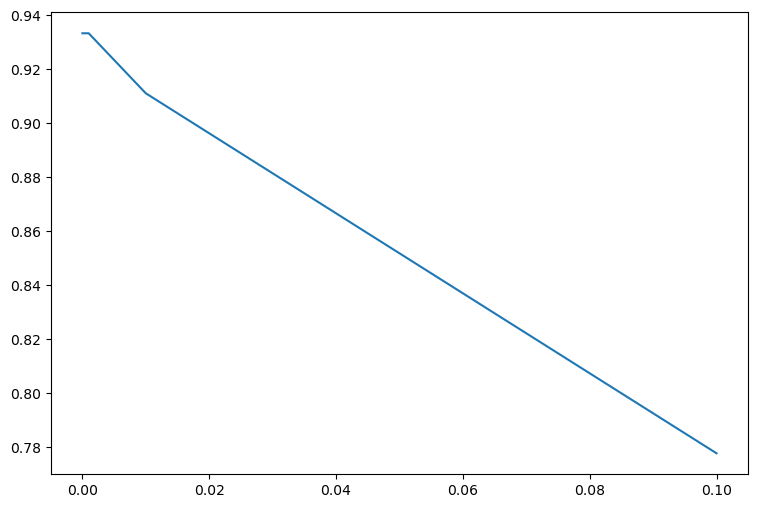

In [51]:
plt.figure(figsize = (9, 6))
plt.plot(var_smoothings, acc)